<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/Avance3_Equipo26_YOLOV8_30EPOCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# Librerías
import os
import random
import shutil

# Definir carpetas base
carpeta_base = '/content/drive/MyDrive'
carpeta_imagenes = os.path.join(carpeta_base, 'Labels')
carpeta_etiquetas = os.path.join(carpeta_base, 'train')

# Crear estructura de dataset para YOLO
yolo_path = '/content/yolo_dataset'
for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_path, 'labels', split), exist_ok=True)

# Listar imágenes y etiquetas
imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.jpg', '.png','.JPG'))])
etiquetas = sorted([f for f in os.listdir(carpeta_etiquetas) if f.endswith('.txt')])

# Emparejar imágenes con sus etiquetas
pares = [(img, img.rsplit('.', 1)[0] + '.txt') for img in imagenes if img.rsplit('.', 1)[0] + '.txt' in etiquetas]
random.shuffle(pares)

# Dividir en 80% train y 20% val
split_idx = int(0.8 * len(pares))
train_pares = pares[:split_idx]
val_pares = pares[split_idx:]

# Función para copiar archivos
def copiar_pares(pares, tipo):
    for img_file, label_file in pares:
        shutil.copy(os.path.join(carpeta_imagenes, img_file), os.path.join(yolo_path, 'images', tipo, img_file))
        shutil.copy(os.path.join(carpeta_etiquetas, label_file), os.path.join(yolo_path, 'labels', tipo, label_file))

copiar_pares(train_pares, 'train')
copiar_pares(val_pares, 'val')

# Crear archivo de configuración YAML
yaml_content = f"""
path: {yolo_path}
train: images/train
val: images/val
nc: 1
names: ['etiqueta']
"""

with open('/content/yolo_dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install ultralytics
from ultralytics import YOLO

# Entrenar modelo base nano
model = YOLO('yolov8n.pt')  # También puedes probar yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/yolo_dataset/dataset.yaml', epochs=30, imgsz=640)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

100%|██████████| 6.25M/6.25M [00:00<00:00, 188MB/s]


Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 37.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 140MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 228.0±11.0 MB/s, size: 2074.8 KB)


train: Scanning /content/yolo_dataset/labels/train... 272 images, 32 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<00:00, 460.35it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 176.5±51.4 MB/s, size: 2463.7 KB)


val: Scanning /content/yolo_dataset/labels/val... 60 images, 5 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 402.01it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.03G      1.047      2.428      1.245         57        640: 100%|██████████| 17/17 [00:32<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.60s/it]

                   all         60         88       0.86      0.364      0.832      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.5G     0.7429       1.16     0.9999         43        640: 100%|██████████| 17/17 [00:19<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60         88      0.892      0.909      0.929      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.52G     0.7765      1.158      1.032         44        640: 100%|██████████| 17/17 [00:25<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60         88      0.899      0.907      0.965      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.53G     0.7951      1.066      1.017         53        640: 100%|██████████| 17/17 [00:25<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60         88      0.861      0.773      0.856      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.55G     0.7175     0.9325     0.9868         57        640: 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         60         88      0.845       0.83       0.85      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.57G     0.7913     0.9432          1         59        640: 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60         88       0.78      0.846      0.917      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.59G     0.7337     0.8826     0.9828         58        640: 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         60         88      0.806      0.818      0.861      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       2.6G       0.74     0.8472       0.99         53        640: 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         60         88      0.834      0.591      0.734      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.62G     0.7044     0.7702     0.9836         53        640: 100%|██████████| 17/17 [00:21<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         60         88       0.71      0.864      0.845      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.64G      0.694     0.7268     0.9695         76        640: 100%|██████████| 17/17 [00:23<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60         88      0.902      0.909       0.93      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.65G     0.6851     0.7312     0.9519         52        640: 100%|██████████| 17/17 [00:21<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         60         88      0.917       0.92      0.934       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.67G     0.6405     0.6586     0.9599         71        640: 100%|██████████| 17/17 [00:22<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         60         88      0.868      0.966      0.946      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.69G     0.6449     0.6282     0.9673         45        640: 100%|██████████| 17/17 [00:23<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60         88      0.871      0.922      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.71G     0.6572     0.6337     0.9525         74        640: 100%|██████████| 17/17 [00:23<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60         88      0.914      0.967      0.975      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.72G     0.6037     0.5964     0.9457         39        640: 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60         88      0.951      0.955      0.982      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.74G     0.5868     0.6115      0.933         71        640: 100%|██████████| 17/17 [00:23<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         60         88      0.948      0.966      0.986      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.76G     0.6241     0.5982     0.9329         50        640: 100%|██████████| 17/17 [00:23<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         60         88      0.939      0.966      0.985      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.77G     0.6201     0.5744     0.9401         42        640: 100%|██████████| 17/17 [00:19<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         60         88      0.916      0.985      0.984       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.79G      0.608     0.5602     0.9287         43        640: 100%|██████████| 17/17 [00:24<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         60         88      0.921       0.92      0.975      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.81G     0.5858      0.521     0.9353         57        640: 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         60         88      0.924      0.961       0.96      0.854


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.82G     0.5209     0.6238     0.9129         24        640: 100%|██████████| 17/17 [00:31<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         60         88      0.896       0.98      0.962      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.84G     0.5062     0.5686     0.8816         23        640: 100%|██████████| 17/17 [00:22<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60         88      0.905      0.955      0.974      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.86G     0.5062     0.5308     0.9064         33        640: 100%|██████████| 17/17 [00:24<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60         88      0.934      0.955      0.986      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.88G     0.5088     0.4859      0.893         23        640: 100%|██████████| 17/17 [00:23<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60         88      0.956      0.979      0.992      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.89G     0.4997     0.4916      0.871         22        640: 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         60         88      0.914          1      0.988       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.91G     0.4957     0.4823     0.8843         19        640: 100%|██████████| 17/17 [00:23<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         60         88      0.943      0.989      0.977      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.93G     0.4687     0.4489     0.8627         28        640: 100%|██████████| 17/17 [00:24<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         60         88      0.954      0.977      0.973      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.94G     0.4663      0.438     0.8543         29        640: 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60         88      0.916      0.997      0.973      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.96G     0.4481     0.4282     0.8667         32        640: 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60         88      0.915      0.989      0.977      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.98G     0.4446     0.4127     0.8601         27        640: 100%|██████████| 17/17 [00:25<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         60         88      0.922      0.989      0.979      0.897



30 epochs completed in 0.211 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         60         88      0.956      0.979      0.992      0.903
Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0656249e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
metrics = model.val()

Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2555.5±1831.6 MB/s, size: 2229.1 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 60 images, 5 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.63s/it]


                   all         60         88       0.95      0.977       0.99      0.904
Speed: 7.2ms preprocess, 11.8ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2


In [9]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8_resultados'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# Copiar pesos entrenados
shutil.copytree('runs/detect/train', os.path.join(ruta_resultados, 'train2'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect/train2', os.path.join(ruta_resultados, 'predict'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8_resultados/predict'

In [10]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8_resultados'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

In [12]:
import shutil

# Copiar pesos entrenados
shutil.copytree('runs/detect/train2', os.path.join(ruta_resultados, 'train2'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect/train', os.path.join(ruta_resultados, 'train'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8_resultados/train'

In [13]:
# Cargar modelo entrenado
model = YOLO('runs/detect/train/weights/best.pt')

# Ruta a tus nuevas imágenes
carpeta_nuevas = '/content/drive/MyDrive/nuevas_imagenes'

# Ejecutar predicciones
results = model.predict(source=carpeta_nuevas, save=True, conf=0.25)

# Las imágenes anotadas se guardan automáticamente en:
# runs/detect/predict


image 1/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6183.JPG: 640x480 10 etiquetas, 40.2ms
image 2/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6184.JPG: 640x480 1 etiqueta, 7.8ms
image 3/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG: 640x480 2 etiquetas, 9.9ms
image 4/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6186.JPG: 640x480 7 etiquetas, 7.1ms
image 5/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6187.JPG: 640x480 2 etiquetas, 8.0ms
image 6/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6188.JPG: 640x480 1 etiqueta, 7.5ms
image 7/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6189.JPG: 640x480 4 etiquetas, 7.6ms
image 8/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6190.JPG: 640x480 (no detections), 8.4ms
image 9/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6191.JPG: 640x480 5 etiquetas, 8.1ms
image 10/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6192.JPG: 640x480 (no detections), 7.6ms
image 11/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6193.JPG: 640x480 1 etiqu

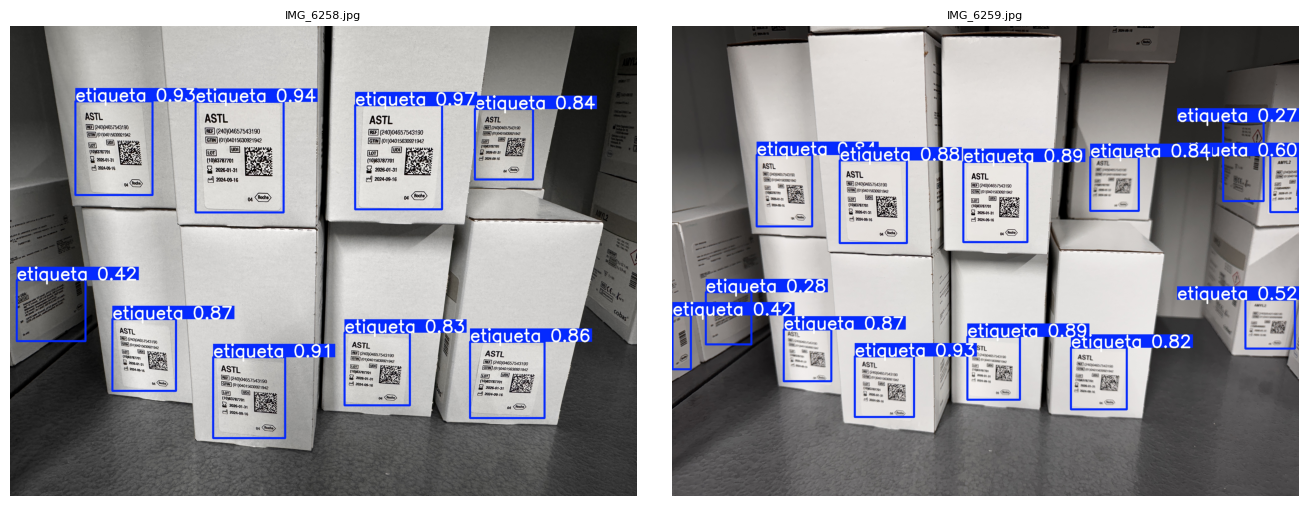

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta donde se guardaron las imágenes predichas
carpeta_resultados = 'runs/detect/predict'
imagenes = sorted([f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))])[75:77]  # Solo 10 primeras

# Parámetros de visualización
imagenes_por_fila = 3
total_imagenes = len(imagenes)
filas = (total_imagenes + imagenes_por_fila - 1) // imagenes_por_fila

plt.figure(figsize=(20, 5 * filas))

for i, nombre in enumerate(imagenes):
    ruta = os.path.join(carpeta_resultados, nombre)
    img = mpimg.imread(ruta)
    plt.subplot(filas, imagenes_por_fila, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()